# Start Here: A Gentle Introduction - First Try

## 1. Introduction: Home Credit Default Risk Competition

이 대회의 목적은 **과거 대출 이력으로 대출을 받은 고객이 상환할 능력이 있는지**를 예측하는 것이다. 이 문제는 지도학습 분류(supervised classification) 문제라 볼 수 있다.
* *Supervised* : label이 trainset에 있고 모델을 학습하여 feature로부터 label을 예측하는 문제
* *Classification* : label이 binary variable인 경우

### 1.1. Data
이 데이터는 은행을 이용하지 않는 고객들에게 신용대출(credit loans)를 제공하는 서비스인 *Home Credit*이 제공하였고 총 7개의 다른 데이터가 제공된다.
* **application_train/application_test**
    - *Home Credit*에서 각 대출 신청에 대한 main trainset과 testset
    - 대출 기록이 row이고 `SK_ID_CURR`로 구분됨
    - trainset의 `TARGET`의 0은 대출상환을, 1은 상환되지 않음을 의미
* **bureau**
    - 다른 금융기관에서의 과거 대출 기록
    - 각각의 대출 기록이 row로 정리되어 있음
    - **application data**의 대출(loan) → 여러개의 이전 신용정보(credit)
* **bereau_balance**
    - 과거 대출들의 월별(monthly) 데이터
    - 각 월별 데이터는 각각의 row로 정리되어 있음
    - 과거 대출기록 한 달에 여러 개일 수 있음
* **previous_application**
    - **application data**에서 대출기록이 있는 고객들이 *Home Credit*에서 신청한 과거 대출기록
    - 현재 대출신청 기록은 여러 개의 과거 대출신청 기록을 가지고 있을 수 있음
    - 과거 대출신청 기록은 row로 정리되어 있으며 `SK_ID_PREV`로 구분됨
* **POS_CASH_BALANCE**
    - *Home Credit*에서 과거 매매 또는 현금 차관들의 월별(monthly) 데이터
    - 각 월별 데이터는 각각의 row로 정리되어 있음
    - 하나의 과거 대출기록은 여러 개의 row를 가질 수 있음
* **credit_card_balance**
    - 고객의 *Home Credit* 과거 신용카드의 월별 데이터
    - 월별 신용카드 잔고가 row로 정리되어 있음
    - 하나의 신용카드가 여러 개의 row를 가질 수 있음
* **installments_payment**
    - *Home Credit*에 과거 대출상환 내역
    - 매 지불금마다 row가 있고, 매 미납금마다도 row가 있음

<br>

![dataset-diagram](../img/home-credit.png)

###  1.2. Metric: ROC AUC
이 대회에서는 평가지표로 가장 흔히 쓰이는 분류기의 기준인 **ROC AUC(Receiver Operating Characteristic Area Under the Curve)**를 사용한다. ROC 곡선은 *true-positive 대 false-positive 비율*을 나타낸다.

![roc-auc](../img/roc-auc.png)

곡선 하나는 각 모델을 나타내며, 선을 따라 이동함은 positive 데이터를 분류하기 위한 임계값(threshold)이 바뀌는 것을 의미한다. 임계값은 오른쪽 위의 0에서부터 시작해 왼쪽 아래에 있는 1로 바뀐다. **어느 곡선보다 위에 있고 왼쪽에 위치한 모델**이 성능이 좋다. 예를 들어 파란색 모델은 빨간색 모델보다 성능이 좋고 검은색 대각선보다 빨간색 모델이 더 좋다.

AUC는 이름 그대로 *ROC 곡선 아래의 면적*을 뜻한다. 이 지표는 0과 1사이의 값이며 값이 높을수록 모델의 성능이 좋다. 예를들어 임의로 값을 예측하는 검은색 모델의 ROC-AUC는 0.5이다.

ROC-AUC로 모델을 측정할 때, 단순히 0 또는 1로 예측하는 게 아니라 0과 1사이의 확률로 예측한다. 불균형한 클래스에서는 정확도는 그리 좋은 지표가 아니다. 그래서 **두 클래스 간의 균형을 나타내는 ROC-AUC나 F1 score 같은 더 진보된 지표**를 사용하여 *분류기 모델의 성능*을 측정한다. ROC-AUC가 높은 모델은 정확도도 높지만, 모델의 성능을 더 잘 표현하기 위해서는 ROC-AUC를 사용하는 게 좋다.

> 자세한 내용은 [여기](https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy)를 참고!

## 2. Imports

In [108]:
# data manipulation
import numpy as np
import pandas as pd

# dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# file system management
import os

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Read in Data
이 Notebook은 Machine Learning Tutorial을 위해 모든 데이터셋을 다 쓰지 않고 main 데이터셋만 활용할 예정
* **application_train**, **application_test**, **submission**만 사용

In [109]:
print(os.listdir('../data/'))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'first_log_reg_baseline.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'log_reg_baseline_1.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'random_forest_baseline_1.csv', 'random_forest_baseline_engineered_1.csv', 'sample_submission.csv']


In [110]:
# train data
app_train = pd.read_csv('../data/application_train.csv')
print('training data shape :', app_train.shape)
app_train.head()

training data shape : (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


train data는 대출기록을 의미하는 307511개의 데이터가 있으며 `TARGET`을 포함하여 총 122개의 feature를 갖고있다.

In [111]:
# test data
app_test = pd.read_csv('../data/application_test.csv')
print('testing data shape :', app_test.shape)
app_test.head()

testing data shape : (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


test data는 train data보다 데이터 양이 적고 `TARGET`을 갖고 있지 않다.

## 4. Exploratory Data Analysis
EDA는 데이터 내의 경향, 이상 징후, 패턴 혹은 관계를 찾기 위해 통계를 내고 figure를 그리는 단계를 말한다. EDA의 목적은 **데이터가 우리에게 말해줄 수 있는 것**을 배우기 위함이다.    
일반적으로 넓은 시각에서 시작해 데이터에서 흥미로운 부분을 발견하면 그 부분으로 영역이 좁혀진다. 그 발견은 그것 자체로도 흥미로울 수 있고, 어떤 feature를 사용할지 결정하는 것을 도와줘 최종 모델 선택을 하는데 사용될 수 있다.

### 4.1. Examine the Distribution of the Target Column
우선 `TARGET`의 각 value의 비율을 살펴보자.

In [112]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

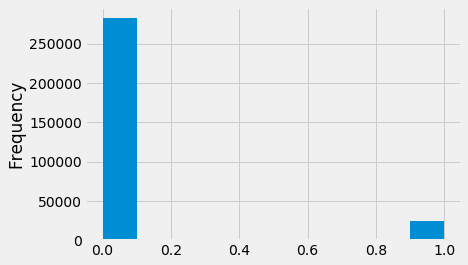

In [113]:
app_train['TARGET'].astype(int).plot.hist()

위의 plot을 통해  상환이 되지 않은 대출보다 상환이 된 대출이 더 많은 것으로 보아 **불균형적인 클래스 문제(imbalanced class problem)**이 있음을 알 수 있다. 나중에 복잡한 모델을 설계하게 되면 이 문제를 해결하기 위해 클래스에 weight를 주어 해결할 수 있다.

### 4.2. Examine Missing Values
각 feature별 missing value의 비율을 살펴보자.

In [114]:
# missing value 비율을 계산
def missing_values_table(df):
    # 전체 missing value개수
    mis_val = df.isnull().sum()

    # missing value 비율
    mis_val_perc = 100 * mis_val / len(df)

    # table 생성
    mis_val_table = pd.concat([mis_val, mis_val_perc], axis=1)

    # column 이름 바꾸기
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'missing values', 1: '% of total values'})

    # missing value 비율을 기준으로 역정렬
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of total values', ascending=False).round(1)
    
    # 요약 출력
    print('your selected dataframe has {} columns.'.format(df.shape[1]))
    print('there are {} columns that have missing values.'.format(mis_val_table_ren_columns.shape[0]))
    
    # missing info에 대한 dataframe 반환
    return mis_val_table_ren_columns

In [115]:
# missing value 통계
missing_values = missing_values_table(app_train)
missing_values.head(30)

your selected dataframe has 122 columns.
there are 67 columns that have missing values.


,missing values,% of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


모델을 만들기 전에 우리는 이 missing value들을 채워줘야 한다(=imputation). 나중에 **imputation할 필요가 없이 missing value를 처리하는 XGBoost** 모델을 후에 사용할 것이다. 다른 방법으로는 높은 비율을 가진 feature들은 제거하는 것이다. 일단은 이 feature들을 버리지 않고 가져갈 예정.

### 4.3. Column Types
이번에는 각 column들의 자료형을 살펴보자. `int64`와 `float64`는 numerical variable(discrete하거나 continous함)이며, `object`는 문자열을 포함한 **categorical feature**이다.

In [116]:
# 자료형 별 feature의 개수
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

`object` column 즉, **categorical feature의 unique value의 개수**를 보자.

> **DataFrame.select_dtypes(include=None, exclude=None)**   
> column의 dtype을 기반으로 dataframe의 부분집합(dataframe)을 반환
> * `include/exclude` : 포함/미포함할 dtype 혹은 string값

> **Series.nunique(dropna=True)**    
> unique value의 개수를 반환
> * `dropna` : NaN을 포함하지 않을 건지

In [117]:
# object column의 unique value의 개수
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 categorical variable이 **비교적 적은 개수의 unique value**를 갖고 있는 걸 볼 수 있다. 나중에 이 categorical variable을 처리할 방법이 필요할 것이다!

### 4.4. Encoding Categorical Variables
그 다음 단계로 가기 전에, 우리는 이 성가신 cateogorical variable을 처리할 필요가 있다. *LightGBM*과 같은 몇몇 모델을 제외하고 머신러닝 모델은 categorical variable을 처리할 수가 없다. 그러므로 우리는 이 variable을 모델에 넣기 전에 **숫자로 encoding하는 방법**을 찾아야 한다. 이 방법으로는 크게 2가지가 있다.

* **Lable Encoding** : 각각의 unique category를 정수(integer)로 변환하는 것. 새로운 column을 만들 필요가 없다.
![label-encoding](../img/label-encoding.png)
* **One-hot Encoding** : 각 unique category만큼 column을 생성하여 해당 value에 해당하는 column은 1을, 아닌 column들에는 0을 할당하는 방법
![one-hot-encoding](../img/one-hot-encoding.png)

*Label Encoding*의 문제는 category에 임의로 순서를 주게 된다는 것이다. 각 category에 할당된 value는 랜덤이고 category 자체에 아무런 영향을 주지 않는다. 하지만 모델은 이 상대적인 값을 가중치로 인식할 수 있다. 만약 `여자/남자`와 같이 unique value가 2개라면은 *Label Encoding*은 괜찮지만, 2개 이상이면 *One-hot Encoding*을 하는 것이 안전한 선택일 것이다.

두 방법의 상대적인 장점에 대한 토론들이 많으며 몇몇 모델은 *Label Encoding*의 단점을 큰 문제없이 잘 해결하기도 한다. 나(저자)는 **많은 class를 가진 categorical variable이라면 category에 임의로 value를 할당하지 않는 _One-hot Encoding_이 가장 안전한 방법**이라 생각한다. _One-hot Encoding_의 유일한 단점이라면 많은 category를 가진 categorical variable의 경우 encoding 후 feature의 개수가 폭발적으로 늘을 수 있다는 점이다. 이 문제를 해결하기 위해 **차원을 낮출 수 있는 PCA나 다른 차원 축소 방식**을 사용하여 _One-hot Encoding_을 할 수 있다.

이 Notebook에서는 **2개의 category를 가진 categorical variable에서는 _Label Encoding_을, 2개 이상의 category를 가진 categorical variable에선 _One-hot Encoding_을 사용**할 것이다. (다만 여기서는 차원축소방식을 사용하지 않을 예정)

#### 4.4.1. Label Encoding and One-Hot Encoding
위에서 말했던 것처럼 `dtype==object`인 2개의 category를 가진 categorical variable은 *Label Ecoding*을 사용하고 2개 이상의 category를 가진 경우는 *One-hot Encoding*을 사용할 것이다.

*Label Encoding*으로는 sklearn의 `LabelEncoder`를, *One-hot Encoding*으로는 pandas의 `get_dummies(df)`를 사용할 것이다.

In [118]:
# label encoding
le = LabelEncoder()
le_count = 0

# feature를 순회
for col in app_train:
    if app_train[col].dtype == 'object':
        # category가 2개 이하일 경우
        if len(list(app_train[col].unique())) <= 2:
            # train data로 학습
            le.fit(app_train[col])
            # train data와 test data 모두 적용
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # 몇 개의 column이 encoding되었는지 카운트
            le_count += 1

print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [119]:
# one-hot encoding
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('training features shape :', app_train.shape)
print('testing features shape :', app_test.shape)

training features shape : (307511, 243)
testing features shape : (48744, 239)


#### 4.4.2. Aligning Training and Testing Data
train data와 test data 모두 같은 feature를 가지고 있어야 한다. test data에서 표현되지 않는 category를 포함한 categorical variable을 가지고 있어서 *One-hot encoding*은 train data에 더 많은 column을 만들게 된다. train data에만 있고 test data에는 없는 column들을 제거하기 위해 **dataframe을 `align`**시킬 필요가 있다.

먼저 train data에서 `TARGET`을 뽑아낸다. 그리고 `align`을 할 때, columns을 바탕으로 정렬하기 위해 꼭 `axis=1`로 세팅시켜야 한다. 그래야 feature를 기준으로 조정을 할 수 있다.

> **DataFrame.align(other, join='outer', axis=None)**
> 정의된 `join`함수와 `axis`로 두 객체를 조정
> - `other` : Dataframe or Series
> - `join` : outer, inner, left, right 중 하나 (집합 관계)
> - `axis` : index, column 혹은 둘다 중 무엇을 기준으로 조정할지

In [120]:
train_labels = app_train['TARGET']

# train data와 test data를 align : 두 dataset에 있는 feature만 보존
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# target을 다시 train data로
app_train['TARGET'] = train_labels

print('training features shape :', app_train.shape)
print('testing features shape :', app_test.shape)

training features shape : (307511, 240)
testing features shape : (48744, 239)


train과 test dataset 모두 같은 feature를 갖게 되었다. feature의 개수는 *One-hot Encoding*에 의해 눈에 띄게 늘어났다. 원한다면 관계가 없는 feature를 제거하는 **차원 축소 방법**을 사용하여 dataset의 크기를 줄일 수도 있다.

### 4.5. Back to Exploratory Data Analysis
#### 4.5.1. Anomalies
EDA를 할 때 항상 맞닥드리는 문제는 바로 데이터 내의 **비정상 데이터(anomalies)**이다. 이런 데이터가 생기는 이유는 잘못 쳤을 수도 있고, 측정 장비의 오류 또는 극단적인 측정 때문일 수도 있다. 

이 데이터를 정량적으로 지원(quantitaively support)하는 방법은 `describe` 함수를 사용해 column의 통계를 내보는 것이다. `DAYS_BIRTH` column의 숫자는 음수인데 현재의 대출 신청을 기준으로 측정되었기 때문이다. 이러한 통계치를 년(year) 단위로 보려면, -1을 곱하고 365를 나누어주면 된다.

In [121]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

이렇게 변환한 뒤 보면 꽤 괜찮아 보인다. 너무 높거나 너무 낮은 연령이 없는 걸 보아 이상치(outlier)도 없다. 그럼 `DAYS_EMPLOYED`는 어떨까?

In [122]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

딱 봐도 잘못된 것처럼 보인다. 최대값이 거의 1000년이다!

Text(0.5, 0, 'days employment')

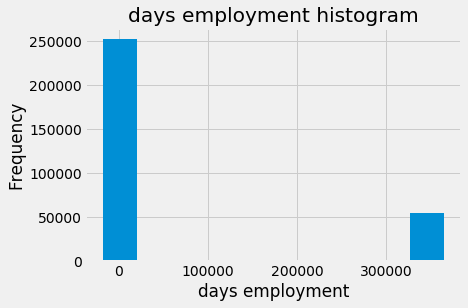

In [123]:
app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

비정상 고객이 정상 고객에 비해 **대출상환 비율이 더 높은지 낮은지** 살펴보자.

In [124]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('the non-anomalies default on {:.2f}% of loans.'.format(100*non_anom['TARGET'].mean()))
print('the anomalies default on {:.2f}% of loans.'.format(100*anom['TARGET'].mean()))
print('there are {} anomalies days of employment.'.format(len(anom)))

the non-anomalies default on 8.66% of loans.
the anomalies default on 5.40% of loans.
there are 55374 anomalies days of employment.


**비정상 고객이 대출상환 비율이 더 낮은 것**으로 나타나고 있다.

비정상 데이터를 다루는 것은 정해진 규칙이 없으며 상황에 따라 달라진다. 가장 안전한 방법 중 하나는 **학습 전에 비정상 데이터의 값을 missing value로 변환하고 Imputation을 통해 채우는 것**이다. 이러한 경우 모든 비정상 데이터들이 같은 값을 가지기 때문에, 모든 대출이 공통적으로 공유될 경우(?)에 대비하여 모두 같은 값으로 채울 것이다. (비정상 데이터 값이 위에서 보면 365243이니까 missing value도 같은 값으로 채워도 괜찮다는 뜻인듯)

비정상 데이터들도 어느정도 중요하기 때문에 머신러닝 모델에 이 값들을 채웠는지 말해주고 싶을 것이다. 이에 대한 해결책으로 **비정상 데이터의 값을 NaN으로** 채우고 **`boolean` column**을 만들어 이 값이 비정상인지 아닌지 나타낼 수 있다.

Text(0.5, 0, 'days employment')

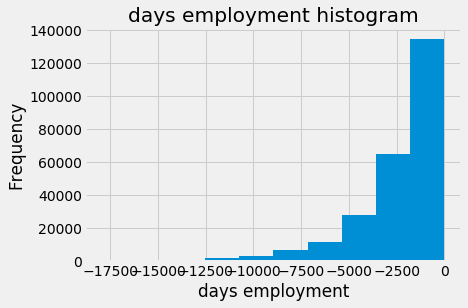

In [125]:
#  anomalous flag column 생성
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# anomalous value를 nan으로 변환
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

분포(distribution)는 예상했던 것과 거의 일치하고 모델에게 이 value가 비정상적인 건이 알려주는 새로운 column도 생성하였다. (nan값으로 변환하였고 feature engineering 때 아마 median값으로 대체될 것임) `DAYS`라는 이름을 가지느 다른 column도 눈에 띄는 이상치(outlier)가 없는 것으로 보인다.

정말 정말 중요! **우리가 train data에서 수행한 작업은 test data에서도 똑같이 해줘야 한다.** test data도 동일하게 새로운 column을 만들고 기존 column에 `np.nan`으로 채워주자.

In [126]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('there are {} anomalies in the test data out of {} entries'.format(
    app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

there are 9274 anomalies in the test data out of 48744 entries


#### 4.5.2. Correlations
categorical variable과 이상치에 대한 처리가 끝났다! 이제 다시 EDA로 돌아가보자. 데이터를 이해하는 방법 중 하나는 **feature와 target 간의 상관관계**를 확인하는 것이다. dataframe의 `corr` 함수를 사용해 각 variable과 target 간의 피어슨 상관계수를 계산할 수 있다.

상관계수는 feature의 연관성(relevance)를 표현하기 위한 아주 좋은 방법은 아니지만 데이터 간의 생각해볼만한 관계에 대한 아이디어를 던져준다. 일반적으로 상관계수의 값은 다음과 같이 인식된다:
* `.00 - .19` : 매우 낮음
* `.20 - .39` : 낮음
* `.40 - .59` : 보통
* `.60 - .79` : 높음
* `.80 - 1.0` : 매우 높음

In [127]:
# target과의 상관계수를 기준으로 정렬
correlations = app_train.corr()['TARGET'].sort_values()

print('most positive correlations :\n', correlations.tail(15))
print('\nmost negative correlations :\n', correlations.head(15))

most positive correlations :
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

most negat

`DAYS_BIRTH`가 `TARGET`과 가장 높은 양의 상관관계를 보이고 있다. `DAYS_BIRTH`는 대출 당시의 고객의 나이를 말하며 음수로 표현되어 있다! 상관관계는 양수이고 value는 음수이므로 **고객이 나이가 들수록 채무불이행을 할 가능성이 적어짐**을 알 수 있다. 어쨌든 우리는 이 값을 절대값으로 변환하여 음의 상관관계로 만들 것이다.

#### 4.5.3. Effect of Age on Repayment

In [128]:
# 양수로 표현된 birth와 target의 상관계수
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

고객이 나이가 들수록 `TARGET`과 음의 선형 관계를 보이는데, 이는 **고객이 나이가 들수록 대출금을 제때 상환하는 경향이 있다**는 것을 의미한다.

Text(0, 0.5, 'count')

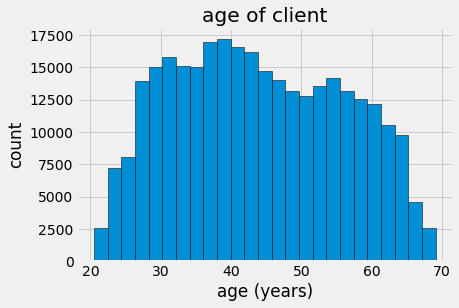

In [129]:
plt.style.use('fivethirtyeight')

# age의 분포 - histogram
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('age of client')
plt.xlabel('age (years)')
plt.ylabel('count')

모든 연령이 타당하므로 이 plot은 **이상치(outlier)가 없다**는 정보 외에 얻을 수 있는 것이 없다.

나이가 `TARGET`에 미치는 영향을 알아보려면 `TARGET`의 값에 따른 kdeplot을 그리면 된다. kdeplot은 각 value마다의 분포를 보여준다. 약간 부드러운(smoothed) 히스토그램으로 생각할 수 있다.

Text(0.5, 1.0, 'distribution of age')

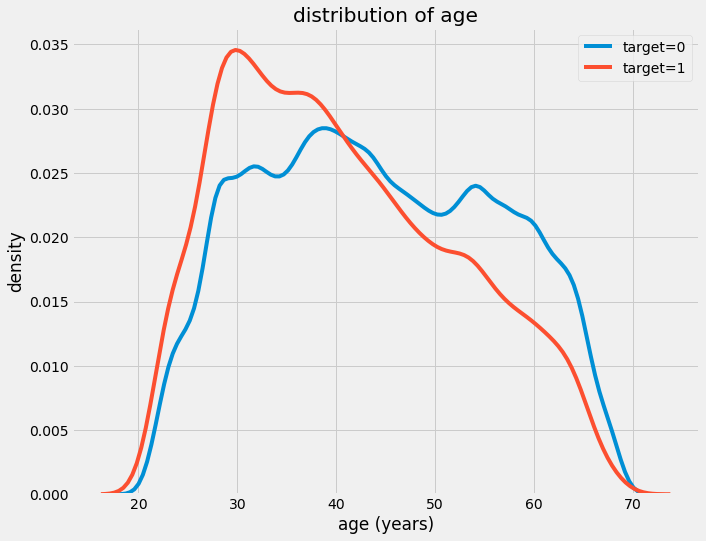

In [130]:
plt.figure(figsize=(10, 8))

# target value 별 사람의 나이 분포 - kdeplot
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target=0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target=1')

plt.xlabel('age (years)')
plt.ylabel('density')
plt.title('distribution of age')

`target=1`을 보면 **어린 나이대 쪽**으로 휘어져 있다. 상관계수가 그렇게 높지는 않지만, `TAERGET`에 어느 정도 영향을 주기 때문에 학습시 유용한 feature로 사용될 수 있다. 

이제 연령층마다 대출 상환 실패율을 살펴보자. age category를 5년씩 통으로 자르고 각 연령대마다 `TARGET`의 평균 값을 구한다. 이 값은 **각 연령층의 대출 상환 비율**을 말해준다.

> **pandas.cut(x, bins)**       
> continuous value를 이상적인 간격으로 나눠준다
> - `x` : 1차원 배열
> - `bins` : 나누는 기준

In [131]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# age data를 나눔(bin)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [132]:
# 구간(bin)에 따라 target의 평균 계산
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'failure to repay by age group')

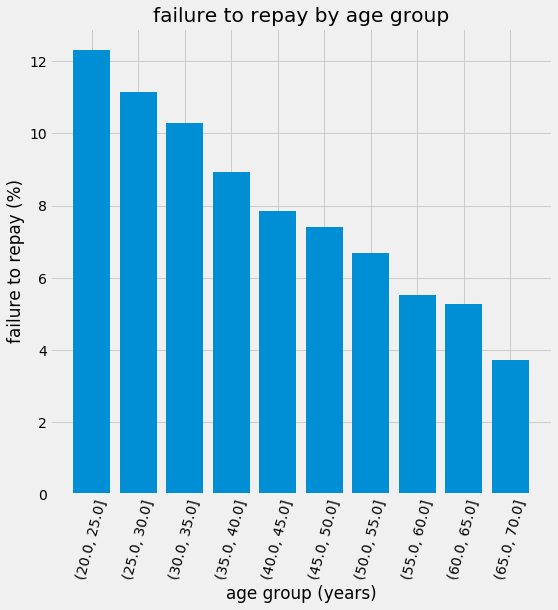

In [133]:
plt.figure(figsize=(8, 8))

# 각 연령대 별 평균 target - barplot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('age group (years)')
plt.ylabel('failure to repay (%)')
plt.title('failure to repay by age group')

여기서 확실한 경향성을 확인할 수 있다. **어린 고객들이 대출 상환을 하지 않을 확률이 더 높다!** 가장 젊은 상위 3개의 그룹은 상환 실패율이 10%를 넘고 가장 늙은 그룹의 경우 5%이하이다.

이 정보는 은행에서 직접적으로 사용이 가능하다. 젊은 고객들의 경우 대출 상환율이 낮기 떄문에 사람들에게 더 자세한 안내나 재정 계획 팁을 제공해줄 수 있다. 이는 은행이 젊은 고객들을 차별해야 한다는 것은 아니지만 **젊은 고객들이 제시간에 상환을 할 수 있도록 예방 조치를 취하는 것**이 현명할 것이다.

#### 4.5.4. Exterior Sources
`TARGET`과 강한 음의 상관관계를 보이는 3개의 variable은 `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`이다. 이 feature들은 **외부 데이터에서 정규화된 점수**를 의미한다. 이게 정확히 무슨 의미를 가지는지 모르지만 수많은 자료 출처를 사용하여 만든 **누적 신용 등급의 종류**일 수도 있다.

In [134]:
# EXT_SOURCE와 TARGET variable의 상관관계
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'correlation heatmap')

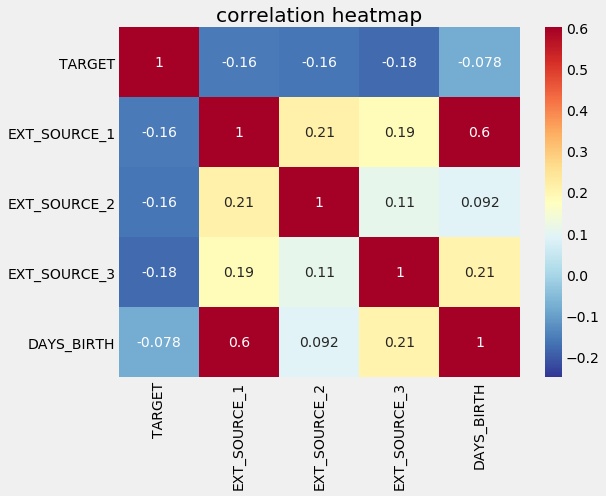

In [135]:
plt.figure(figsize=(8,6))

# 상관관계 heatmap
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('correlation heatmap')

`EXT_SOURCE` feature 모두 `TARGET`과 음의 상관관계를 가짐을 볼 수 있다. 이는 **`EXT_SOURCE`의 값이 증가할수록, 고객이 상환을 할 확률이 높음**을 말한다. 또한 `DAYS_BIRTH`가 `EXT_SOURCE1`과 양의 상관관계를 갖는데, 이 feature의 한 용인이 고객의 나이임을 추측해볼 수 있다.

이번에는 `TARGET`의 value별 각 feature의 분포를 살펴보자.

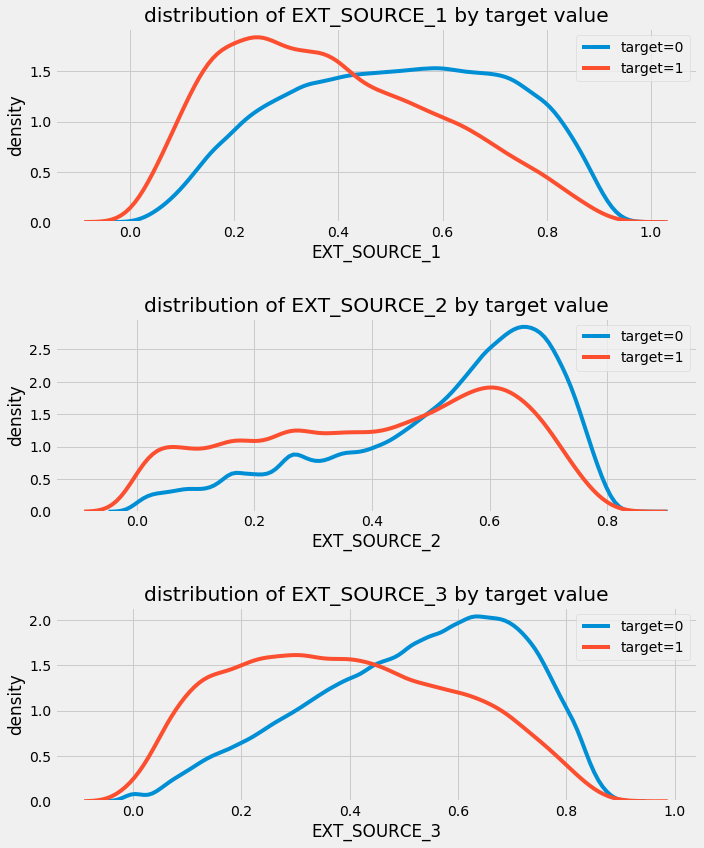

In [136]:
plt.figure(figsize=(10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target=0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target=1')
    
    plt.title('distribution of {} by target value'.format(source))
    plt.xlabel(str(source))
    plt.ylabel('density')

# subplot 사이의 간격을 조절
plt.tight_layout(h_pad=2.5)

`EXT_SOURCE_3`이 각 `TARGET`의 value의 분포가 크게 다른 것을 볼 수 있다. 이는 이 feature가 고객이 대출상환을 할 가능성과 연관이 있음을 알 수 있다. 이 관계성이 그렇게 크지는 않지만 제때 상환 여부를 예측하는데 유용할 것이다.

### 4.6. Pairs Plot
`EXT_SOURCE`와 `DAYS_BIRTH`와의 pairplot을 그려보자. pair plot은 여러 변수 쌍 간의 관계 뿐만 아니라 단일 변수의 분포도 살펴볼 수 있는 훌륭한 도구이다! seaborn의 *PairGrid*를 사용하여 **위의 삼각형**은 scatter plot으로, **대각선**은 histogram으로, **아래 삼각형**은 kdeplot과 상관계수를 나타내보자.

Text(0.5, 1.05, 'ext source and age features pairs plot')

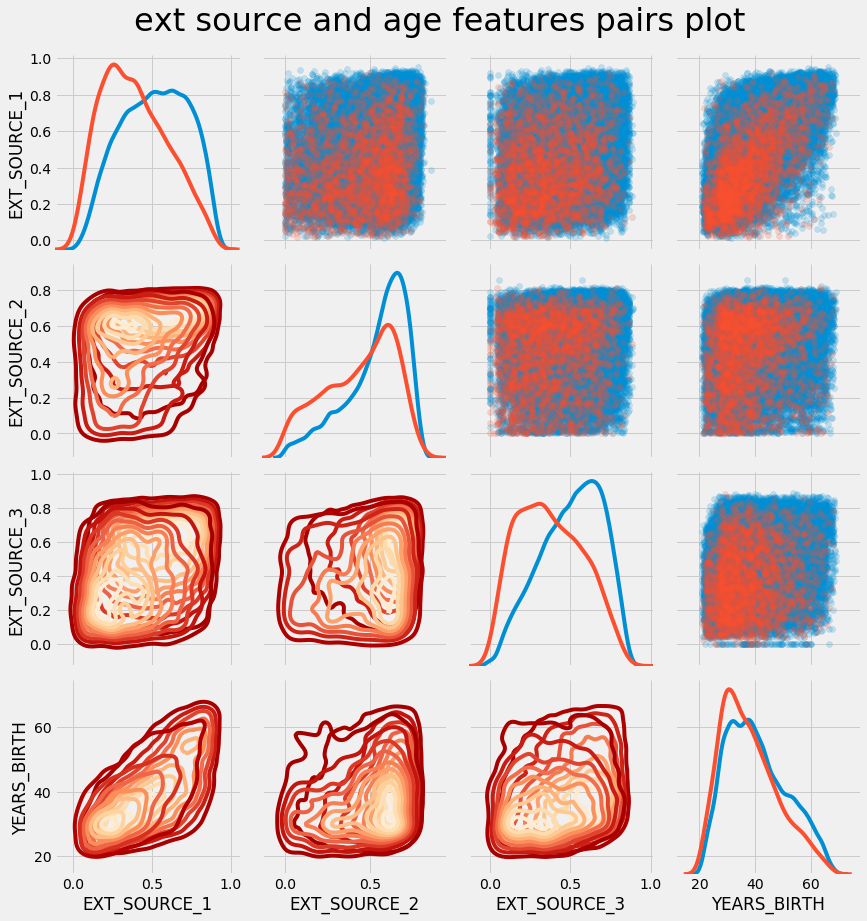

In [137]:
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# age 데이터 추가
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# nan 값을 버리고 100000까지 슬라이싱
plot_data = plot_data.dropna().loc[:100000, :]

# 두 column 간 상관계수를 계산하는 함수
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate('r={:.2f}'.format(r), 
                xy=(.2, .8), 
                xycoords=ax.transAxes, 
                size=20)

# pairgrid object를 생성
grid = sns.PairGrid(data=plot_data, 
                    size=3, 
                    diag_sharey=False, 
                    hue='TARGET', 
                    vars=[x for x in list(plot_data.columns) if x!='TARGET'])

# upper - scatter plot
grid.map_upper(plt.scatter, alpha=0.2)

# diag - histogram
grid.map_diag(sns.kdeplot)

# bottom - density plot
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)
plt.suptitle('ext source and age features pairs plot', size=32, y=1.05)

이 plot에서 빨간색은 대출미상환을, 파란색은 대출 상환을 나타낸다. `EXT_SOURCE_1`과 `DAYS_BIRTH`가 양의 선형 상관관계를 가지고 있으며 이는 고객의 나이를 꼭 고려해야함을 나타낸다.

## 5. Feature Engineering
kaggle 대회는 보통 feaature engineering으로 판가름난다. 즉, 데이터에서 가장 유용한 feature를 뽑아낸 사람이 우승을 한다. 머신러닝에서는 모델 설계나 하이퍼 파라미터 튜닝보다는 feature engineering이 훨씬 더 좋은 성과를 가져온다. 가장 좋은 모델 최적의 파라미터도 중요하지만, 모델은 오직 주어진 데이터로부터 학습을 한다. 

feature engineering은 기존의 데이터로부터 새로운 feature를 만드는 **feature construction**과 가장 중요한 feature만 선택하거나 차원을 줄이는 **feature selection** 모두를 말한다. 

이 데이터를 가지고 많은 feature engineering을 할 수 있지만 여기서는 대표적인 feature construction 방식 2가지를 사용할 것이다.
* Polynomial Features
* Domain Knowledge Features

### 5.1. Polynomial Features
feature construction의 가장 단순한 방식은 **Polynomial Features**이다. 이 방식은 feature의 거듭제곱과 feature간의 interaction term을 feature로 만들어내는 것이다. 원래 단일 항일 때 `TARGET`에 큰 영향을 주지 않을 수 있지만 여러 개의 feature를 조합해 하나의 interaction feature를 만들었을 때 `TARGET`와 연광성을 보일 수 있다. interaction term은 보통 여러 변수의 효과를 포착하기 위해 통계적 모델에서 사용되지만 저자의 말로는 머신러닝에서 그렇게 자주 사용되지 않는다고 한다. 그럼에도 불구하고 대출 상환 여부를 예측하는데 도움이 되는지 알아보기 위해 시도는 해볼 수 있다.

이제 `EXT_SOURCE`와 `DAYS_BIRTH` feature들을 사용해 polynomial feature를 만들어보자. scikit-learn에서는 특정 차수의 다항이나 상호작용항을 만들어주는 `PolynomialFeatures`를 제공한다. 차수를 3으로 설정하고 결과를 살펴보자. (참고로 차수는 너무 높게 잡으면 안된다. 차수가 너무 높으면 feature의 값이 기하급수적으로 높아져 overfitting을 유발할 수 있다.)

In [138]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns=['TARGET'])

# missing value 채우기
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# 3차로 polynomial object생성
poly_transformer = PolynomialFeatures(degree=3)

In [139]:
# polynomial feature 학습
poly_transformer.fit(poly_features)

# feature 변환
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('polynomial features shape :', poly_features.shape)

polynomial features shape : (307511, 35)


In [140]:
poly_transformer.get_feature_names(
    input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

이번에는 `TARGET`과 새로운 feature 간의 상관관계를 살펴보자.

In [141]:
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names(
    ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# target 추가
poly_features['TARGET'] = poly_target

# 상관계수 계산
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# 상위 양의, 음의 상관관계를 가진 feature
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


몇몇 새로운 variable이 크기를 기준으로 볼 때 원래 feature보다 더 큰 상관관계를 가지는 것을 볼 수 있다. 일단 이 새로운 feature를 train data와 test data의 복사본에 추가하여 나중에 이 feature가 있을 때와 없을 때의 모델 성능을 비교해 볼 것이다.

In [142]:
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names(
    ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# train dataframe에 polynomial features 추가
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')
# test dataframe에 polynomial features 추가
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features, on='SK_ID_CURR', how='left')

# dataframe align - 정리(?)
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

print('training data with polynomial features shape :', app_train_poly.shape)
print('testing data with polynomial features shape :', app_test_poly.shape)

training data with polynomial features shape : (307511, 275)
testing data with polynomial features shape : (48744, 275)


### 5.2. Domain Knowledge Features
데이터와 관련된 분야의 지식을 사용할 수도 있다! [Aguiar의 Notebook](https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features)을 참고하여 다음의 5가지 feature를 사용해볼 것이다.
* `CREDIT_INCOME_PERCENT` : 고객의 소득 대비 신용 거래의 비율
* `ANNUITY_INCOME_PERCENT` : 고객 소득 대비 대출 연금의 비율
* `CREDIT_TERM` : 원 납입기간(연금이 월 납입액이기 때문)
* `DAYS_EMPLOYED_PERCENT` : 고객 나이 대비 고용 일수의 비율

In [143]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / \
    app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / \
    app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / \
    app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / \
    app_train_domain['DAYS_BIRTH']

In [144]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / \
    app_test_domain['DAYS_BIRTH']

#### 5.2.1. Visualize New Variables


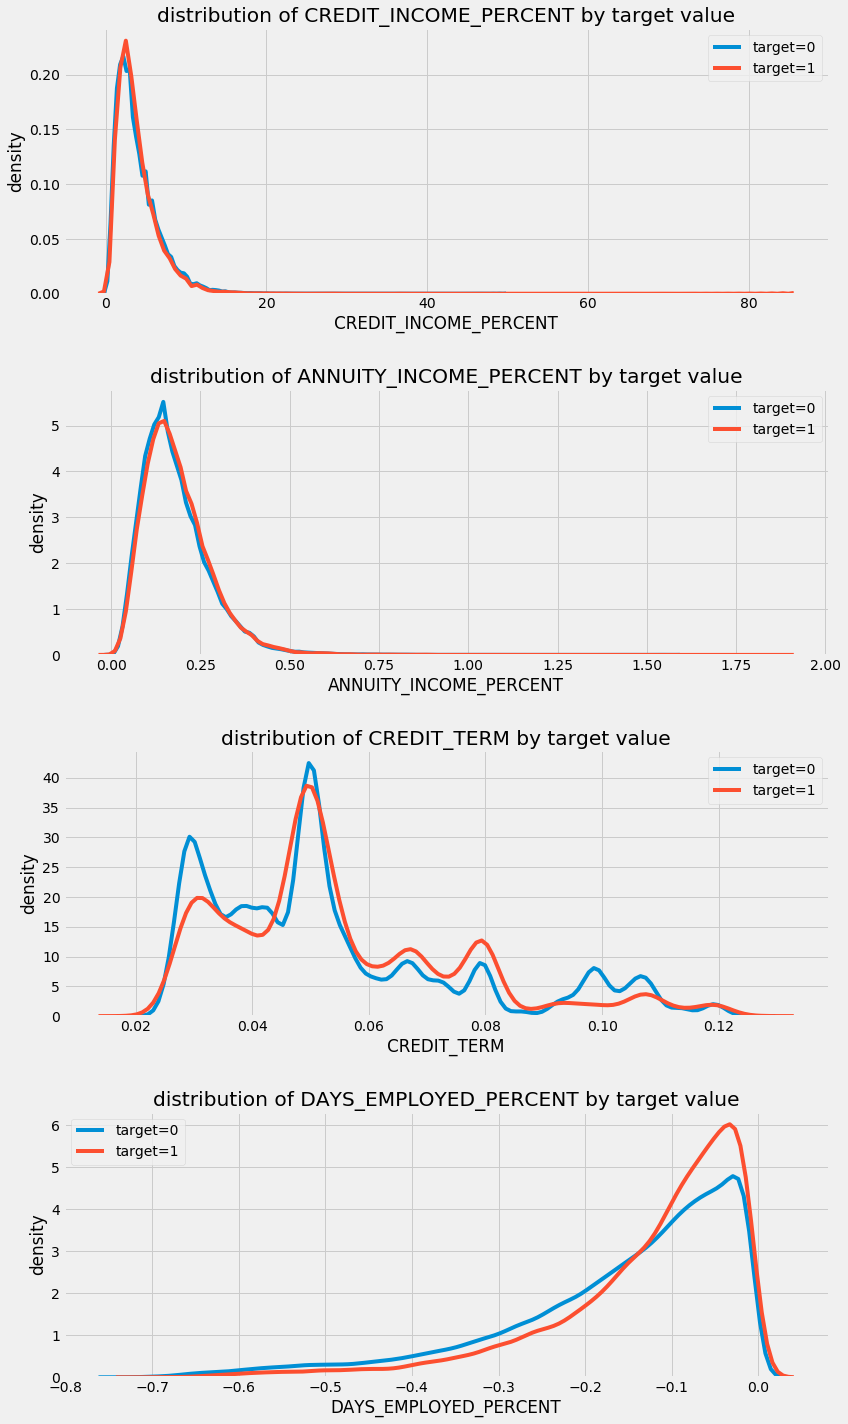

In [145]:
plt.figure(figsize=(12, 20))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], label='target=0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], label='target=1')
    
    plt.title('distribution of {} by target value'.format(feature))
    plt.xlabel(str(feature))
    plt.ylabel('density')
    
plt.tight_layout(h_pad=2.5)

이 variable이 쓸모가 있을지는 모르지만 일단 시도는 해보자!

## 6. Baseline

나이브 베이스라인으로 test data에 대해 모두 같은 값으로 예측할 수 있다. 대출금을 상환하지 않을 확률을 예측하다고 할 때, 확실하지 않다면 test data의 관찰을 바탕으로 0.5라고 추측할 수 있다. 이렇게 해서 ROC-AUC는 0.5라는 값을 얻는다.

우리가 이미 어떤 점수를 받을지 알고 있기 때문에 굳이 나이브 베이스라인을 만들 필요는 없다. 조금 더 복잡한 Logistic Regession으로 실제 베이스라인을 잡아보자.

> https://datacadamia.com/data_mining/baseline

### 6.1. Logistic Regression Implementation

베이스라인(기준선)을 얻기 위해서 categorical variable을 encoding하고 모든 feature들을 사용할 것이다. missing value를 채우고(imputation) feature의 값을 정규화시켜(feature scaling) e데이터를 전처리할 것이다. 다음은 이 전처리 단계의 코드이다.

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# target column 분리
if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()

# feature names
features = list(train.columns)

# test data 복사
test = app_test.copy()

# median으로 missing value채움
imputer = SimpleImputer(strategy='median')

# 0과 1사이의 값으로 scaling
scaler = MinMaxScaler(feature_range=(0,1))

# train data로 학습
imputer.fit(train)

# train과 test 데이터 모두 적용
train = imputer.transform(train)
test = imputer.transform(app_test)

# scaler도 똑같이 반복
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('training data shape :', train.shape)
print('testing data shape :', test.shape)

training data shape : (307511, 240)
testing data shape : (48744, 240)


첫 번째 모델로 scikit-learn의 `LogisticRegression`을 사용할 것이다. 단 오버피팅을 조절하년 regularization parameter인 `C`를 조금 낮출 것이다. (값이 낮을수록 오버피티을 줄여준다.) 기본 회귀모델보다 조금 더 좋은 성능을 낼 것이지만 나중에 만들 다른 모델보다는 성능이 낮다.
* 모델을 생성하고
* `fit`을 사용해 모델을 학습시키고
* `predict_proba`를 이용해 test data에 대해 예측하고 (우리는 0, 1이 아니라 확률을 원한다)

In [147]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train, train_labels)    # 학습

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

이제 모델이 학습되었으니 예측을 해보자. 우리는 대출 상환하지 않을 확률을 예측할 것이므로 `predict_proba`라는 메서드를 사용할 것이다. 이 함수는 데이터의 개수 m만큼 $m*2$의 배열을 반환한다. 첫 번째 column은 `target=0`일 때의 확률이고 두 번째 column은 `target=1`일 때의 확률이다. 우리는 상환하지 않을 경우의 확률을 원하므로 두번째 column만 뽑을 것이다.

In [148]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

예측한 것은 `sample_submission.csv` 파일의 포맷을 따라야한다. 거기에는 두 개의 column이 있는데 `SK_ID_CURR`과 `TARGET`이다. 이 포맷으로 `submit`이라는 dataframe을 만들어보자.

In [149]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


예측값은 0과 1사이의 상환하지 않을 확률을 나타낸다. 고객을 분류하기 위해 이 예측값을 사용한다면, 위험군을 결정하기 위해 경계값(threshold)를 설정할 수 있다.

In [150]:
submit.to_csv('../data/log_reg_baseline_1.csv', index=False)

만약 kaggle에 제출할 경우 score가 약 0.671일 것이다.

### 6.2. Improved Model: Random Forest
우리 베이스라인의 조잡한 성능을 끌어올리기 위해 알고리즘을 업데이트 해볼 수 있다. 같은 데이터로 Random Forest 모델을 적용하여 성능을 비교해보자. 우리가 수백개의 tree를 사용할 때 Random Forest는 엄청난 성능을 보여준다. 100개의 tree를 사용하여 만들어보자.

In [151]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

In [152]:
# 학습
random_forest.fit(train, train_labels)

# feature importances 추출
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# test data로 예측
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [153]:
# submission dataframe 생성
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# save
submit.to_csv('../data/random_forest_baseline_1.csv', index=False)

이 모델로 제출을 하면 score는 약 0.678일 것이다.

#### 6.2.1. Make Predictions using Engineered Features
polynomial features와 domain knowledge가 모델의 성능을 향상시키는지 확인할 유일한 방법은 이 feature들을 가지고 직접 모델을 학습해보는 것이다. 이 feature가 있을 때와 없을 때의 성능을 비교해보자.

##### polynomial features

In [154]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [156]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [157]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('../data/random_forest_baseline_engineered_1.csv', index = False)

이 모델도 제출을 하면 약 **0.678**의 점수를 받는다. 이를 보아 feature construction이 그닥 쓸모가 없다는 걸 알 수가 있다.

##### domain features

In [158]:
app_train_domain = app_train_domain.drop(columns='TARGET')
domain_features_names = list(app_train_domain.columns)

# domainnomial featues imputer
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# scale domainnomial features
scaler = MinMaxScaler(feature_range=(0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [160]:
random_forest_domain = RandomForestClassifier(
    n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# 학습
random_forest_domain.fit(domain_features, train_labels)

# feature importances 추출
feature_importances_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame(
    {'feature': domain_features_names, 'importance': feature_importances_values_domain})

# 예측
predictions = random_forest_domain.predict_proba(domain_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [161]:
# submission dataframe 생성
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.to_csv('../data/random_forest_baseline_domain_1.csv', index=False)

점수가 0.679인 것으로 보아 engineered features는 그닥 도움이 되는 것 같지 않다. (하지만 노트북 끝에 Gradient Boosting Model에서는 도움이 된다!)

### 6.3. Model Interpretation: Feature Importances
가장 관련 있는 variable이 무엇인지 발견하는 방법으로는 random forest의 feature importance를 살펴보는 것이다. eda에서 구한 상관관계를 고려했을 때, `EXT_SOURCE`와 `DAYS_BIRTH`가 가장 중요한 feature라고 예측할 수 있다. 나아중에 이것들의 feature importances를 가지고 차원 축소할 때 쓸 수도 있다.

In [165]:
# plot도 하고 역정렬도 해줌
def plot_feature_importances(df):
    # importance를 기준으로 feature를 정렬
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # 정규화
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # horizontal bar로 feature importance 시각화
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # 역정렬
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align='center',
           edgecolor='k')
    
    # yticks과 label 설정
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # labeling plot
    plt.xlabel('normalized importance')
    plt.title('feature importances')
    
    plt.show()
    
    return df

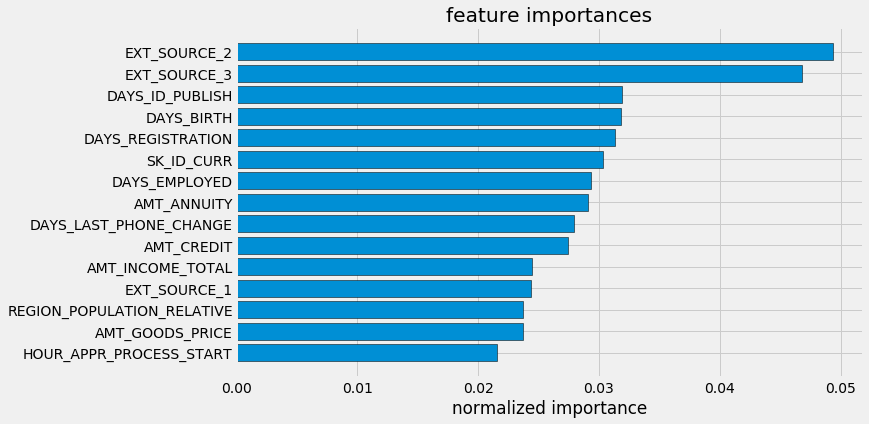

In [166]:
feature_importances_sorted = plot_feature_importances(feature_importances)

예상했다 싶이 가장 중요한 feature는 `EXT_SOURCE`와 `DAYS_BIRTH`이다. 위의 figure에 보다싶이 상단한 importance를 가진 feature가 소수가 있다는 걸 알 수 있으며 성능 저하 없이 많은 feature들을 제거할 수 있을 것이다. (오히려 성능을 증가시킬 수도 있다) feature importance는 모델을 해석하거나 차원 축소를 하는 정교한 방법은 아니지만 모델이 예측할 때 어떤 요소를 고려하는지 이해할 수 있다.

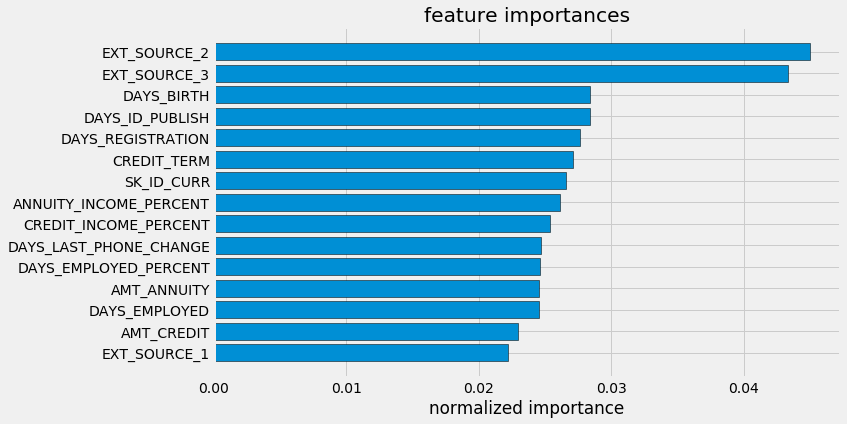

In [167]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

우리가 직접 만든 feature들 4개 모두가 상위 15위에 들어있는 걸 볼 수 있다. 도메인 지식이 적어도 부분적으로 효과가 있음을 알 수 있다.

## 7. Conclusions
다음은 머신러닝 프로젝트의 일반적인 과정이다:
1. 문제와 데이터 이해하기
2. 데이터 클렌징과 포맷팅 (거의 우리가 함)
3. EDA
4. baseline model (기준 모델 - 이걸 가지고 이 정도 성능은 넘어야한다 가늠을 함)
5. 개선된 model
6. Model interpretation (조금 - feature importance 같은 걸 말하는 듯)

머신러닝 대회는 한 평가지표에서 가장 좋은 성능을 내는 것에만 집중하고 해석(interpretation)에 집중하지 않는 일반적인 데이터사이언스 대회아는 조금 다르다. 하지만 우리의 모델이 어떻게 결정을 내렸는지 이해함으로써 모델을 개선시키거나 에러를 바로잡기 위해 실수(mistakes)를 조사할 수 있다. 나중의 노트북(이 저자가 쓰는 시리즈 노트북)에서 여러 데이터를 통합시키고 더 복잡한 모델을 구축하고 점수를 향상시키는 방법을 볼 것이다.

### Follow-up Notebooks

이 노트북은 개인적으로 필사하는 게 좋을 것 같다. 많은 걸 배울 수 있을 것 같음!

* [Manual Feature Engineering Part One](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering)
* [Manual Feature Engineering Part Two](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2)
* [Introduction to Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics)
* [Advanced Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory)
* [Feature Selection](https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection)
* [Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)

## 8. Just for Fun: Light Gradient Boosting Machine

Gradient Boosting Machine은 현재 구조화된 데이터셋(특히 Kaggle)에 대한 학습을 위한 선도적인 모델이며, 대히에서 좋은 성적을 받으려면 아마도 이런 모델을 사용해야할 것이다.

In [168]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [177]:
def model(features, test_features, encoding='ohe', n_folds=5):
    '''
    교차 검증을 사용하여 lgbm 모델을 학습시키고 예측한다.

    Parameters
    ----------
        - features (pd.DataFrame): 모델 학습에 사용할 데이터프레임. TARGET 피처를 가지고 있어야함.
        - test_features (pd.DataFrame): 모델 예측에 사용할 테스트 피처들의 데이터프레임.
        - encoding (str, default='ohe'): 카테고리형 변수 인코딩 방법. 'ohe'는 원-핫 인코딩을, 'le'은 라벨인코딩을 말함.
        - n_folds(int, default=5): 교차 검증시 사용할 폴드 수

    Return
    ----------
        - submission (pd.DataFrame): 'SK_ID_CURR'와 모델이 예측한 'TARGET'이 있는 데이터프레임
        - feature_importances (pd.DataFrame): 모델로부터 나온 feature importances로 된 데이터프레임
        - valid_metrics (pd.DataFrame): 각 폴드 및 전체적인 학습과 검증 평가지표(ROC-AUC)로 된 데이터프레임
    '''

    # id 추출
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']

    # train data에서 label 추출
    labels = features['TARGET']

    # id와 target 제거
    features = features.drop(columns=['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns=['SK_ID_CURR'])

    # 원-핫 인코딩
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)

        # column을 기준으로 dataframe align
        # 인코딩하고 train에만 더 feature가 있는 걸 방지
        # 공통 피처들만 남긴다
        features, test_features = features.align(
            test_features, join='inner', axis=1)

        # categorical feature 생성 안됨 X - only label encode
        # 추측이지만 나중에 풀고 싶을 때 풀기 위함인 듯
        cat_indices = 'auto'
    # 라벨 인코딩
    elif encoding == 'le':
        label_encoder = LabelEncoder()
        cat_labels = []    # categorical index를 저장

        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # categorical feature를 정수로 매핑
                features[col] = label_encoder.fit_transform(
                    np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(
                    np.array(test_features[col].astype(str)).reshape((-1,)))
                
                cat_indices.append(i)
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('training data shape :', features.shape)
    print('testing data shape :', test_features.shape)
    
    # feature name 추출
    feature_names = list(features.columns)
    
    # np array로 변환
    features = np.array(features)
    test_features = np.array(test_features)
    
    # kfold 객체 생성
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
    
    # feature importances의 빈 배열 생성
    feature_importance_values = np.zeros(len(feature_names))
    
    # test 예측을 위한 빈 배열 생성
    test_predictions = np.zeros(test_features.shape[0])
    
    # 폴드별 validation 예측을 위한 빈 배열 생성
    out_of_fold = np.zeros(features.shape[0])
    
    # validation과 training score를 저장하기 위한 리스트
    valid_scores = []
    train_scores = []
    
    # 각 fold마다 순회
    for train_indices, valid_indices in k_fold.split(features):
        # 현재 fold에서 학습 데이터
        train_features, train_labels = features[train_indices], labels[train_indices]
        # 현재 fold에서 검증 데이터
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # 모델 생성
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                  class_weight='balanced', learning_rate=0.05,
                                  reg_alpha=0.1, reg_lambda=0.1,
                                  subsample=0.8, n_jobs=-1,
                                  random_state=50)
        # 모델 학습
        model.fit(train_features, train_labels, eval_metric='auc',
                 eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                 eval_names=['valid', 'train'],
                 categorical_feature=cat_indices,
                 early_stopping_rounds=100,
                 verbose=200)
        
        # 가장 좋은 iteration 기록
        best_iteration = model.best_iteration_
        
        # feature importaces 기록
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # 모델 예측
        test_predictions += model.predict_proba(test_features, num_iteration=best_iteration)[:,1]
        
        # fold prediction 기록 - fold 외에 쓰일 예정이라서 out of 인가..?
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:,1]
        
        # 최고 점수 기록
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # memory 정리 - 가비지 콜랙터
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # submission dataframe 생성
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # feature importances dataframe 생성
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # 최종 validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # 최종 score를 metrics에 추가
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # validaion score 데이터프레임 생성을 위해 필요
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # validation score 데이터프레임
    metrics = pd.DataFrame({'fold': fold_names,
                           'train': train_scores,
                           'valid': valid_scores})
    
    return submission, feature_importances, metrics

In [178]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline Metrics')
print(metrics)

training data shape : (307511, 239)
testing data shape : (48744, 239)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79887	train's binary_logloss: 0.547648	valid's auc: 0.754949	valid's binary_logloss: 0.563125
Early stopping, best iteration is:
[208]	train's auc: 0.80025	train's binary_logloss: 0.546264	valid's auc: 0.755109	valid's binary_logloss: 0.562276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798518	train's binary_logloss: 0.548144	valid's auc: 0.758539	valid's binary_logloss: 0.563479
Early stopping, best iteration is:
[217]	train's auc: 0.801374	train's binary_logloss: 0.545314	valid's auc: 0.758619	valid's binary_logloss: 0.561732
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79774	train's binary_logloss: 0.54923	valid's auc: 0.762652	valid's binary_logloss: 0.564246
[400]	train's auc: 0.827288	train's binary_logloss: 0.520152	valid's auc: 0.762202	valid's binary_

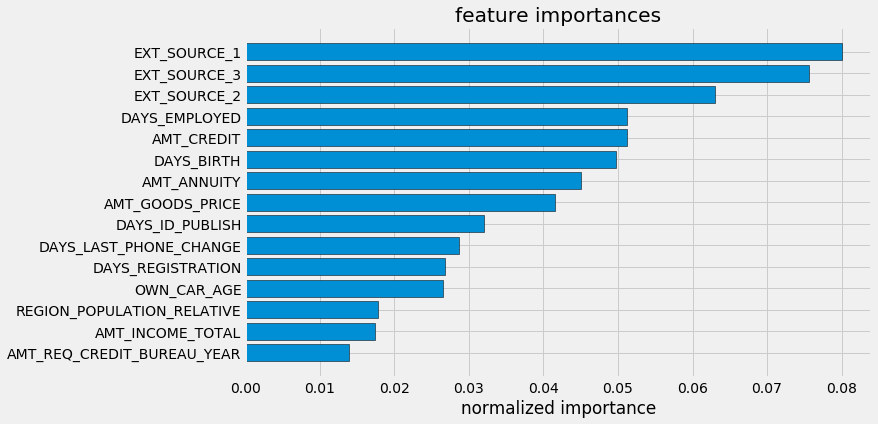

In [180]:
fi_sorted = plot_feature_importances(fi)

In [181]:
submission.to_csv('../data/baseline_lgb_1.csv', index=False)

이걸 제출하면 리더보드에 0.735 점수를 얻는다!

In [182]:
app_train_domain['TARGET'] = train_labels

# 도메인 지식 피처로 테스트
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

training data shape : (307511, 243)
testing data shape : (48744, 243)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804531	train's binary_logloss: 0.541661	valid's auc: 0.762577	valid's binary_logloss: 0.557281
Early stopping, best iteration is:
[237]	train's auc: 0.810671	train's binary_logloss: 0.535426	valid's auc: 0.762858	valid's binary_logloss: 0.553438
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804304	train's binary_logloss: 0.542018	valid's auc: 0.765594	valid's binary_logloss: 0.55808
Early stopping, best iteration is:
[227]	train's auc: 0.808665	train's binary_logloss: 0.537574	valid's auc: 0.765861	valid's binary_logloss: 0.555268
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.803753	train's binary_logloss: 0.542936	valid's auc: 0.770139	valid's binary_logloss: 0.557892
[400]	train's auc: 0.834338	train's binary_logloss: 0.511693	valid's auc: 0.770328	valid's bina

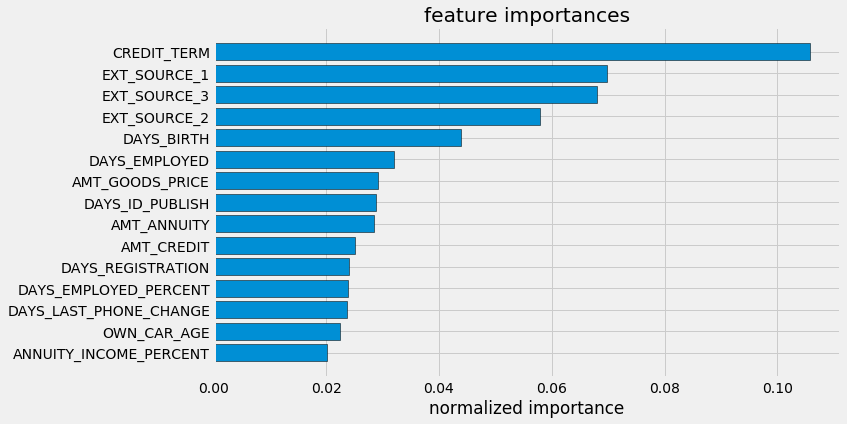

In [183]:
fi_sorted = plot_feature_importances(fi_domain)

다시 말하지만, 우리가 만든 몇몇 피처들이 중요하다는 것을 볼 수 있다. 앞으로 어떤 다른 도메인 지식 피처가 이 문제에 유용할 수 있는지 생각해 볼 필요가 있을 것이다. (또는 금융 전문가와 상의를 해야한다!)

In [184]:
submission_domain.to_csv('../data/baseline_lgb_domain_features_1.csv', index=False)

이 모델은 0.754의 score를 갖는다. 이를 보아 확실히 도메일 지식이 성능에 도움을 준 것을 볼 수있다! feature engineering은 대회에서 가장 중요한 단계다!